
SBI Life insurance Dataset:

Here are the feature information present in the dataset. 

age : age of policyholder 
    
sex: gender of policy holder (female=0, male=1) 
    
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 

steps: average walking steps per day of policyholder children: number of children / dependents of policyholder 
        
smoker: smoking state of policyholder (non-smoke=0;smoker=1)
    
region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)
    
charges: individual medical costs billed by health insurance 

insuranceclaim: yes=1, no=0

This probelm requires predicition whether insurance claim made or not based on above features. 

In [1]:
# Import all the necessary librareis to handle and understand/visualize data. 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Read  SBI_Life_insurance dataset
df = pd.read_csv("SBI_Life_insurance.csv")

In [3]:
# Let see top five rows of the dataset
df.head(5)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
# info will return information about the dataframe including the data types of each column and memory usage of the entire data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [5]:
# Lets check the number of rows and columns 
print(df.shape)

(1338, 8)


In [6]:
# Lets do the basic Statistical Exploration on each column except sex column. 
df1= df.drop('sex', axis=1)
df1.describe()

,age,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


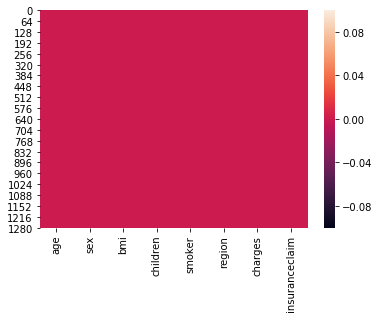

In [7]:
# Visual representation for finding null values using Heat Map
sns.heatmap(df.isnull())
plt.show()

This heatmap clearly indicates there is no null value in the dataset

In [8]:
# Lets see the unique values in each column 
print(df.nunique())

age                 47
sex                  2
bmi                548
children             6
smoker               2
region               4
charges           1337
insuranceclaim       2
dtype: int64


 Perform EDA to understand data

In [9]:
# Seperate data into features and target set
feature_data=df.drop('insuranceclaim', axis=1)
target_class=df['insuranceclaim']
print(feature_data.shape)
print(target_class.shape)

(1338, 7)
(1338,)


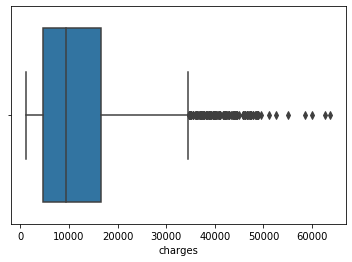

In [10]:
# Lets see outlier in charges column 
plt.plot(figsize=(15,10))
sns.boxplot(feature_data['charges'])

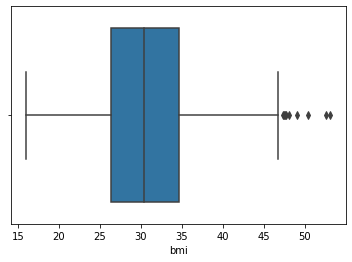

In [11]:
# Lets see outlier in bmi column
plt.plot(figsize=(15,10))
sns.boxplot(feature_data['bmi'] )

bmi column does not have much outlier as compared to charges column

Text(0.5, 1.0, 'Insurance claim Distribution')

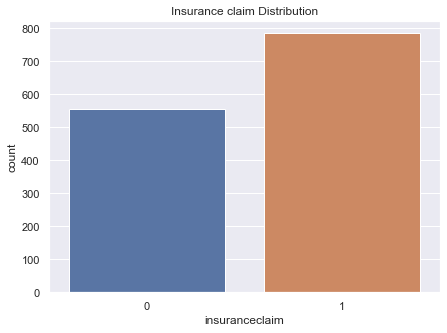

In [12]:
# Visual representation of the dependent variable distribution in the dataset
sns.set(rc={'figure.figsize':(7,5)})
class_c=df['insuranceclaim']
mu_data_count=sns.countplot(x=class_c, data=df)
plt.title("Insurance claim Distribution")

This Bar distribution indicates relatively more claim has been made.

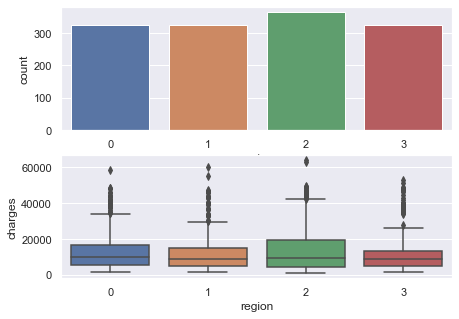

In [14]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = df, x = 'region', ax = ax1)

ax2 = fig.add_subplot(2,1,2) 
sns.boxplot(data = df, x='region', y='charges' , ax = ax2)

This count plot indicates more charges have been imposed in southeast but there is not significant difference. 

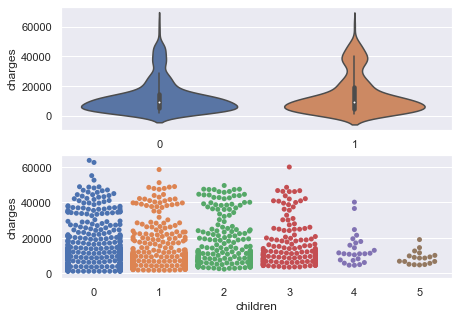

In [15]:
# Violin plot gives you a lot of details on your underlying data
fig = plt.figure()
ax2 = fig.add_subplot(2,1,1) 
sns.violinplot(data = df, x='sex', y='charges' , ax = ax2)

ax3 = fig.add_subplot(2,1,2)
sns.swarmplot(data = df, x='children', y='charges')

Above violin indicates almost equal charges imposed on female and male. 

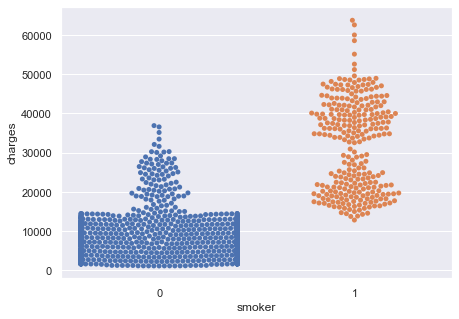

In [16]:
sns.swarmplot(data = df, x='smoker', y='charges')

Smokers paying more charges then non-smokers. 

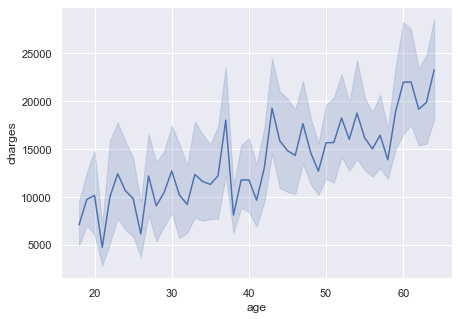

In [17]:
# Draw a line plot between age and charges. 
sns.lineplot(x = "age", y = "charges", data=df)
plt.show()

As age increasing chages of health company is also increasing 

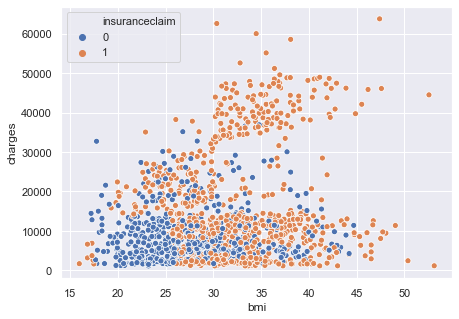

In [18]:
# Draw a scatter plot to understand the relationship of bmi and charges. 
sns.scatterplot(x = "bmi", y = "charges", hue="insuranceclaim", data=df)
plt.show()

In [19]:
# Correlation in the feature set.
corr=df.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1,-0.021,0.11,0.042,-0.025,0.0021,0.3,0.11
sex,-0.021,1,0.046,0.017,0.076,0.0046,0.057,0.032
bmi,0.11,0.046,1,0.013,0.0038,0.16,0.2,0.38
children,0.042,0.017,0.013,1,0.0077,0.017,0.068,-0.41
smoker,-0.025,0.076,0.0038,0.0077,1,-0.0022,0.79,0.33
region,0.0021,0.0046,0.16,0.017,-0.0022,1,-0.0062,0.021
charges,0.3,0.057,0.2,0.068,0.79,-0.0062,1,0.31
insuranceclaim,0.11,0.032,0.38,-0.41,0.33,0.021,0.31,1


There is no correlation discovered in the feature space

Lets remove the outlier from the dataset using Z-score before feeding data into ML Models.

In [20]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

[[1.43876426 1.0105187  0.45332    ... 1.34390459 0.2985838  0.84190989]
 [1.50996545 0.98959079 0.5096211  ... 0.43849455 0.95368917 0.84190989]
 [0.79795355 0.98959079 0.38330685 ... 0.43849455 0.72867467 1.18777557]
 ...
 [1.50996545 1.0105187  1.0148781  ... 0.43849455 0.96159623 0.84190989]
 [1.29636188 1.0105187  0.79781341 ... 1.34390459 0.93036151 1.18777557]
 [1.55168573 1.0105187  0.26138796 ... 0.46691549 1.31105347 0.84190989]]


In [21]:
threshold = 3
print(np.where(z > 3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [22]:
df1 = df[(z < 3).all(axis=1)]
df1.shape

(1309, 8)

In [23]:
# Seprate data into features and target set
feature_=df1.drop('insuranceclaim', axis=1)
target_=df1['insuranceclaim']
print(feature_.shape)
print(target_.shape)

(1309, 7)
(1309,)


In [24]:
# Lets use the standard scaler to standardize the features. As we have seen there is huge variation in the features. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature_data_std = sc.fit_transform(feature_)
print(feature_data_std)

[[-1.43906316 -1.00536197 -0.44935891 ...  1.98484827  1.35275274
   0.32345355]
 [-1.5100858   0.99466663  0.53339072 ... -0.50381685  0.44745962
  -0.96849975]
 [-0.79985933  0.99466663  0.40447808 ... -0.50381685  0.44745962
  -0.73635529]
 ...
 [-1.5100858  -1.00536197  1.04904129 ... -0.50381685  0.44745962
  -0.97665735]
 [-1.29701786 -1.00536197 -0.80093884 ... -0.50381685  1.35275274
  -0.94443291]
 [ 1.54388803 -1.00536197 -0.25347866 ...  1.98484827 -0.45783349
   1.36800497]]


In [53]:
# Import all the necessary sklearn libraries require for modelling and results representation. 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib 

In [26]:
# Lets split the data using 52 random states. 
x_train, x_test, y_train, y_test = train_test_split(feature_data_std, target_, test_size=0.20, shuffle=True, random_state=52)
[subset.shape for subset in [x_train,y_test,x_train,y_test]]

[(1047, 7), (262,), (1047, 7), (262,)]

Here we specifically considered logistic Regression, Support vector Machine, decision tree along with grid search to find the best hypermeter to train the model and compare the results of three models.

In [27]:
# Create function for classification with grid search to find best parameters to train and test the model. 
def grid_search(estimator, clf, x_train, x_test, y_train, y_test):
    if estimator == 'DecisionTree':
        # Decision Tree
        dtree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)),
                        "min_samples_leaf": list(range(5,20,1))}
        grid_dtree = GridSearchCV(DecisionTreeClassifier(), dtree_params)
        grid_dtree.fit(x_train, y_train)
        # tree best estimator
        tree_clf = grid_dtree.best_estimator_
        print("Best Parameters for Decision Tree: ", grid_dtree.best_estimator_)
        print("Best Score for Decision Tree: ", grid_dtree.best_score_)
        print("******************************************")
        return tree_clf
    elif estimator == 'SVM':
        # Support Vector Machine
        svc_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                      'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
        grid_svc = GridSearchCV(SVC(), svc_params)
        grid_svc.fit(x_train, y_train)
        # SVC best estimator
        svc = grid_svc.best_estimator_
        print("Best Parameters for SVM: ", grid_svc.best_estimator_)
        print("Best Score for SVM: ", grid_svc.best_score_)
        print("******************************************")
        return svc
    
    elif estimator == 'LogistiRegression':
        # ElasticNet
        log_reg_params = {'C':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                      'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['lbfgs']}
        grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params )
        grid_log_reg.fit(x_train, y_train)
        # SVC best estimator
        log_reg = grid_log_reg.best_estimator_
        print("Best Parameters for SVM: ", grid_log_reg.best_estimator_)
        print("Best Score for SVM: ", grid_log_reg.best_score_)
        print("******************************************")
        return log_reg   

In [49]:
#Define function for overall evaluation. 
def apply_classification(estimator, clf, x_train, x_test, y_train, y_test):
    #Find the best parameter by grid search
    grid_clf = grid_search(estimator, clf, x_train, x_test, y_train, y_test)
    
    
    
    # 0.20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=52)
    
    scores = cross_val_score(grid_clf, x_train, y_train, cv=10)
    print("Mean Accuracy of Cross Validation: %", round(scores.mean()*100,2))
    print("Std of Accuracy of Cross Validation: %", round(scores.std()*100))
    print("==============================================")
    
    
    
    #Predict the test data as selected classifier
    clf_prediction = grid_clf.predict(x_test)
    _accuracy = sum(y_test == clf_prediction)/len(y_test)
    print("Accuracy of",estimator,":",_accuracy*100)
    
    
    #print confusion matrix and accuracy score before best parameters
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",estimator,":\n", _conf_matrix)
    print("==========================================")
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))
    
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++')
    
    #Area under the ROC curve for classifiers
    _ROC_Curve=metrics.roc_auc_score(y_test,clf_prediction)
    print("ROC Score: ", _ROC_Curve)
  
    # Define Function to plot the ROC curve 
    def plot_roc_curve(roc_auc):
        
        plt.plot(fp_rate, tp_rate, color='blue', label='ROC = %0.2f' % _ROC_Curve)
        plt.plot([0, 1], [0, 1], color='red', linestyle='-.')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic Curve')
        plt.legend()
        plt.show()
    
    # Plot AUC_ROC curve 
    fp_rate, tp_rate, thresholds= roc_curve(y_test, clf_prediction)
    roc_auc=auc(fp_rate, tp_rate)
    plot_roc_curve(roc_auc)
   
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++')


    #visualize the confusion matrix using Heatmap
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    
    # Create heatmap
    sns.heatmap(pd.DataFrame(_conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    return grid_clf

Best Parameters for SVM:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Best Score for SVM:  0.8987650945545683
******************************************
Mean Accuracy of Cross Validation: % 89.97
Std of Accuracy of Cross Validation: % 3.0
Accuracy of LogistiRegression : 83.96946564885496
Confusion matrix of LogistiRegression :
 [[ 90  20]
 [ 22 130]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.87      0.86      0.86       152

    accuracy                           0.84       262
   macro avg       0.84      0.84      0.84       262
weighted avg       0.84      0.84      0.84       262

+++++++++++++

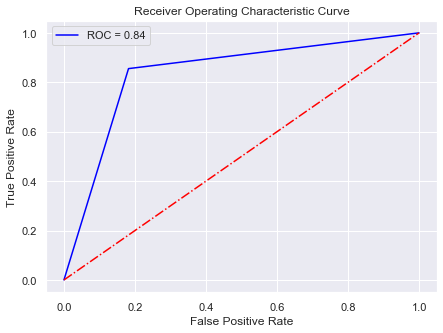

+++++++++++++++++++++++++++++++++++++++++++++++++++


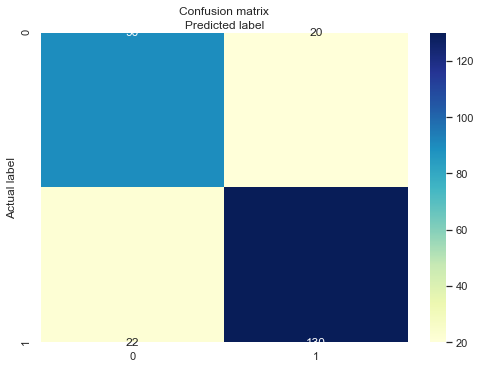

In [50]:
logreg = LogisticRegression()
logreg_classifier = apply_classification('LogistiRegression', logreg, x_train, x_test, y_train, y_test)

Best Parameters for SVM:  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best Score for SVM:  0.9121348826611986
******************************************
Mean Accuracy of Cross Validation: % 91.02
Std of Accuracy of Cross Validation: % 3.0
Accuracy of SVM : 88.16793893129771
Confusion matrix of SVM :
 [[102   8]
 [ 23 129]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       110
           1       0.94      0.85      0.89       152

    accuracy                           0.88       262
   macro avg       0.88      0.89      0.88       262
weighted avg       0.89      0.88      0.88       262

+++++++++++++++++++++++++++++++++++++++++++++++++++
ROC Score:  0.8879784688995216


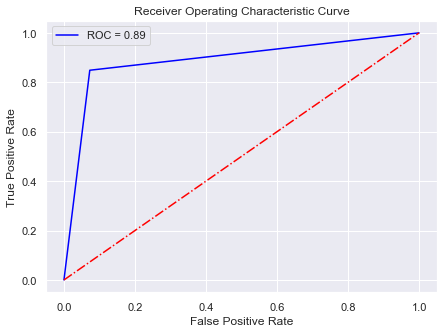

+++++++++++++++++++++++++++++++++++++++++++++++++++


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

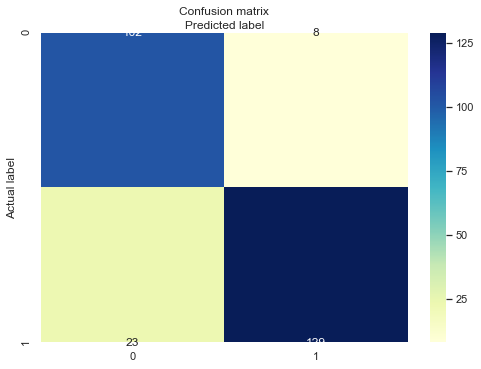

In [51]:
svm = SVC()
apply_classification('SVM', svm, x_train, x_test, y_train, y_test)

Best Parameters for Decision Tree:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=26, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Best Score for Decision Tree:  0.960788334472545
******************************************
Mean Accuracy of Cross Validation: % 97.61
Std of Accuracy of Cross Validation: % 2.0
Accuracy of DecisionTree : 97.32824427480917
Confusion matrix of DecisionTree :
 [[109   1]
 [  6 146]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       110
           1       0.99      0.96      0.98       152

    accuracy                           0.97       262
   macro av

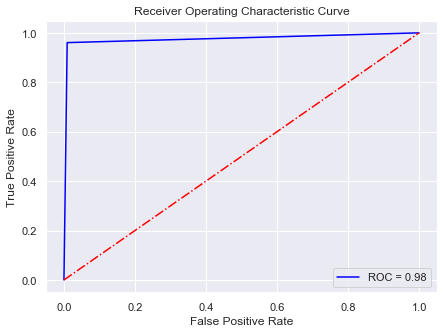

+++++++++++++++++++++++++++++++++++++++++++++++++++


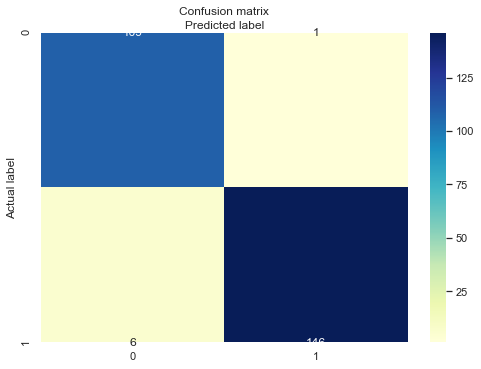

In [52]:
dt = DecisionTreeClassifier()
dt_classifier = apply_classification('DecisionTree', dt, x_train, x_test, y_train, y_test)

Out of three ML models used in this predcition. Decision tree outperformed with 97.5% of accuracy. 

In [56]:
# Lastly save the model for futher use
joblib.dump(dt_classifier, 'SBIinsuranceClaim.pkl')

['SBIinsuranceClaim.pkl']